# Finalized version, testing

**A Trial Notebook**

First, we try to import numpy package.

In [1]:
from scipy.io import loadmat
import pandas as pd
from sklearn import preprocessing, cluster, metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import time

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Shared_Drive/01_Water/102_WaterMLClustering/Diya

/content/drive/Shareddrives/HMC_FLUID_Group/01_Water/102_WaterMLClustering/Diya


In [3]:
%ls

'Clustering Clean FINAL_Copy.ipynb'
'Clustering Clean FINAL .ipynb'
'Clustering .ipynb'
 ComputeStructureFactor_v1.0.ipynb
 ComputeStructureFactor_v2.0_Copy.ipynb
 ComputeStructureFactor_v2.0.ipynb
 condacolab_install.log
'Copy of Clustering .ipynb'
 dcd_testMD30.0_0.dcd
 dcd_tip4p2005_T30_N1024_Run01_0.dcd
 DiyaTrial.ipynb
 inistate_testMD30.0.pdb
 inistate_tip4p2005_T30_N1024_Run01.pdb
'Initial research: week 1 and 2.gdoc'
 OrderParam_Run21_swm4ndp_T-20.0.csv
 OrderParam_Run21_swm4ndp_T-20.0.dcd
 OrderParam_Run21_swm4ndp_T-20.0.mat
 OrderParamZeta_Run21_swm4ndp_T-20.0.mat
'Q Data'/
 StructureFactor_exploration.ipynb
'Untitled0 (1).ipynb'
 Untitled0.ipynb


In [4]:
water = loadmat('OrderParam_Run21_swm4ndp_T-20.0.mat')
water1 = loadmat('OrderParamZeta_Run21_swm4ndp_T-20.0.mat')

q_all = []
for i in range(0,20):
    q_all.extend(water['q_all'][i])
Q6_all = []
for i in range(0,20):
    Q6_all.extend(water['Q6_all'][i])
LSI_all = []
for i in range(0,20):
    LSI_all.extend(water['LSI_all'][i])
Sk_all = []
for i in range(0,20):
    Sk_all.extend(water['Sk_all'][i])
zeta_all = []
for i in range(0,20):
  zeta_all.extend(water1['zeta_all'][i])


data = {'q_all': q_all,
        'Q6_all': Q6_all,
        'LSI_all': LSI_all,
        'Sk_all': Sk_all,
        'zeta_all': zeta_all
        }

df = pd.DataFrame(data)

# Scaling the data
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Scaled DataFrame columns:", df_scaled.columns)

Scaled DataFrame columns: Index(['q_all', 'Q6_all', 'LSI_all', 'Sk_all', 'zeta_all'], dtype='object')


Number of clusters: 1
Silhouette Score cannot be calculated because there is only one cluster.


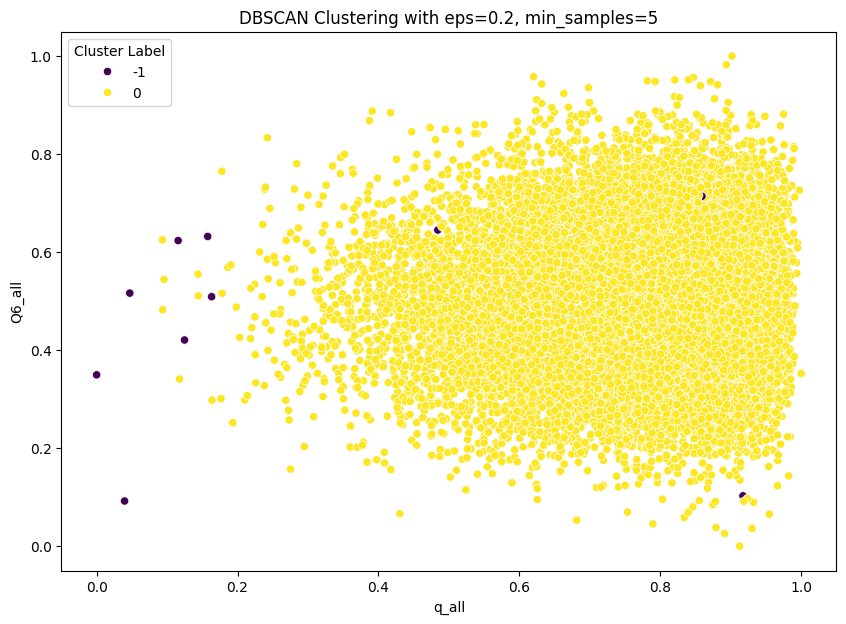

In [5]:
#INDIVIUAL CLUSTERING (TO CHANGE SCALING)

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Apply DBSCAN clustering
eps = 0.2  # Adjust this parameter as needed
min_samples = 5  # Adjust this parameter as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit and predict clusters
labels = dbscan.fit_predict(df_scaled)
df_scaled['labels'] = labels

# Check the number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {num_clusters}")

# Evaluate silhouette score if there are at least 2 clusters
if num_clusters > 1:
    sil_score = silhouette_score(df_scaled.drop('labels', axis=1)[labels != -1],
                                 labels[labels != -1])
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("Silhouette Score cannot be calculated because there is only one cluster.")

# Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df_scaled['q_all'],
    y=df_scaled['Q6_all'],
    hue=labels,
    palette='viridis',
    legend="full"
)
plt.title(f"DBSCAN Clustering with eps={eps}, min_samples={min_samples}")
plt.xlabel('q_all')
plt.ylabel('Q6_all')
plt.legend(title="Cluster Label")
plt.show()

## DB SCAN

In [6]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
t0 = time()
dbscan = DBSCAN(eps=0.1, min_samples=5)  # You may need to adjust these parameters
labels = dbscan.fit_predict(df_scaled)
t1 = time()
print(f"DBSCAN clustering time: {t1 - t0:.2f} sec")

# Count the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

if n_clusters > 1:  # Check for at least two clusters (excluding noise)
    # Create mask for non-noise points
    mask = labels != -1
    # Calculate silhouette score only on non-noise points
    sil_score = silhouette_score(df_scaled[mask], labels[mask])
    print(f'Silhouette Score: {sil_score:.4f}')
else:
    print("Silhouette Score cannot be calculated because there is only one cluster.")

# Create a copy for plotting to avoid modifying original df_scaled
df_plot = df_scaled.copy()
df_plot['labels'] = labels

DBSCAN clustering time: 3.54 sec
Number of clusters: 1
Number of noise points: 201
Silhouette Score cannot be calculated because there is only one cluster.


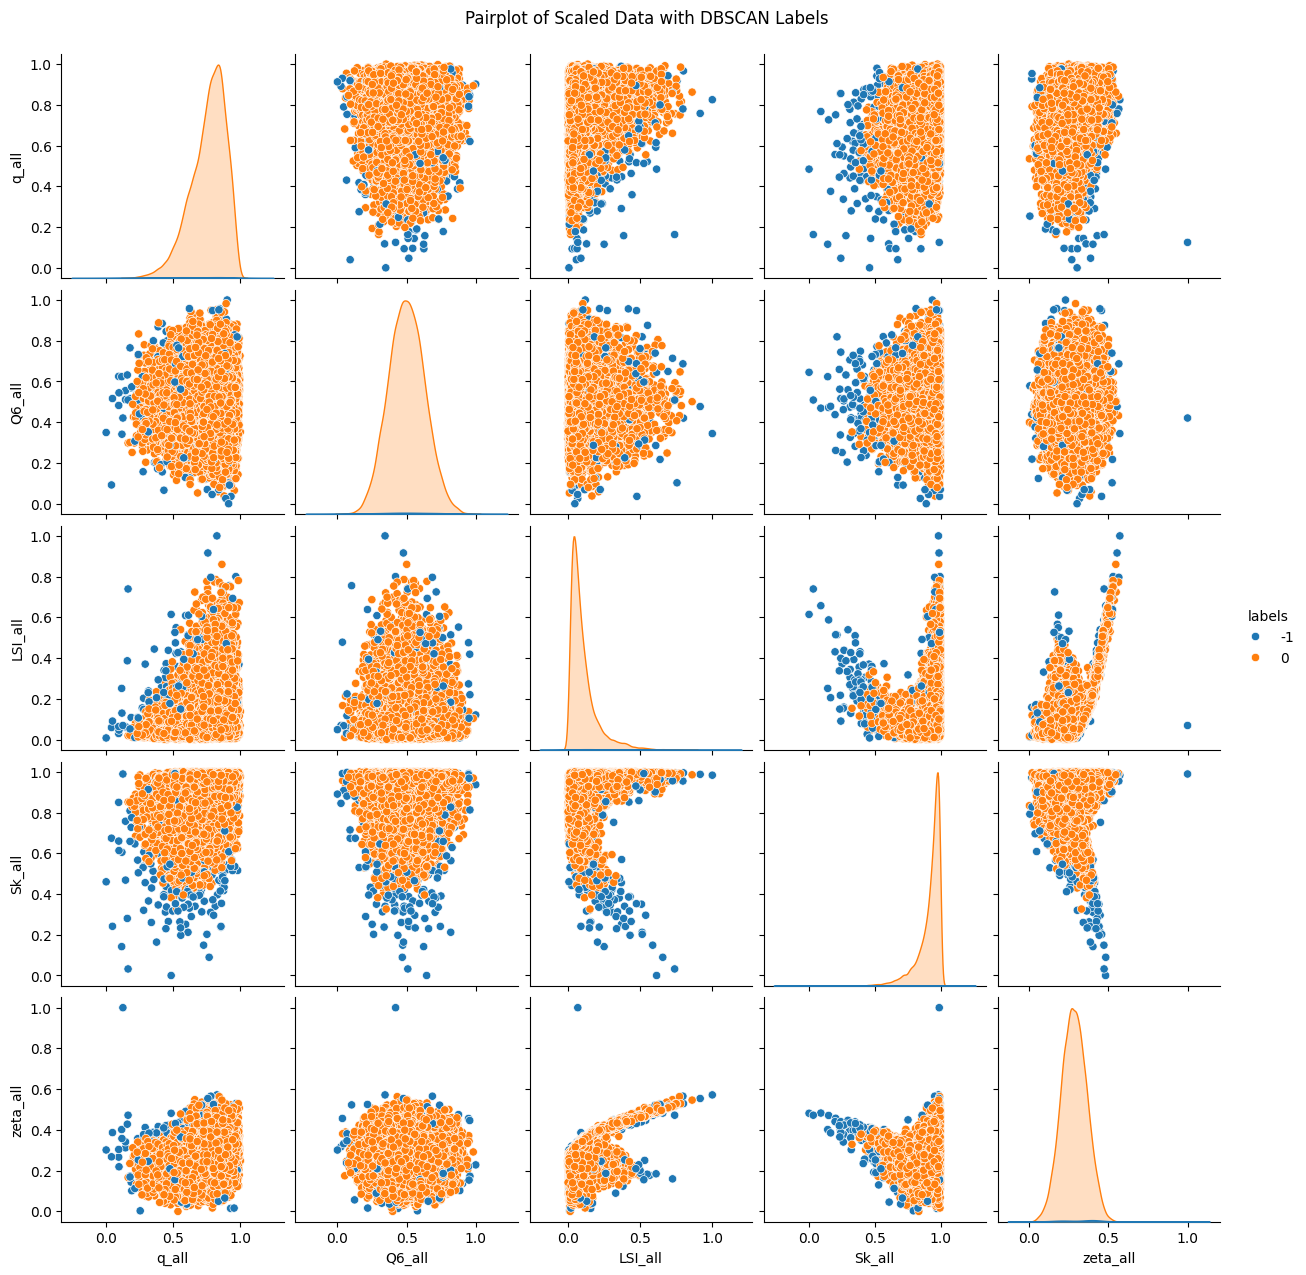

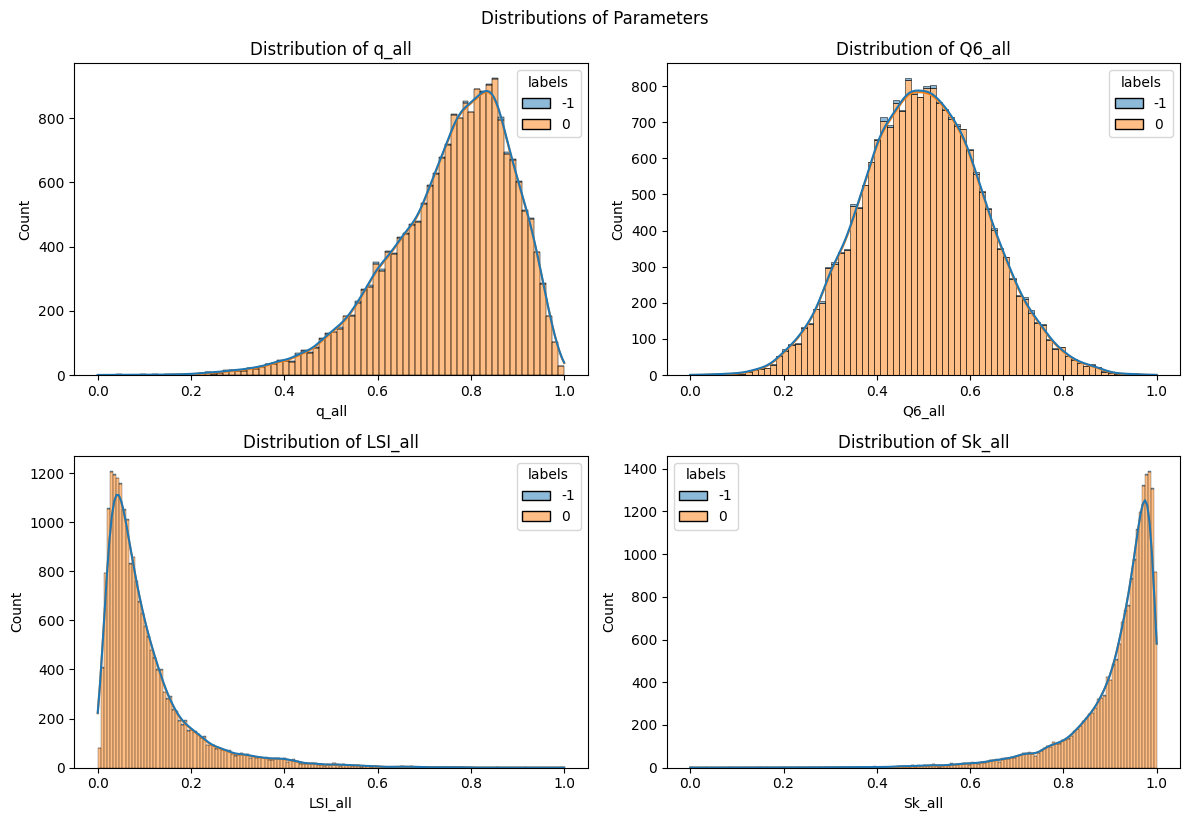

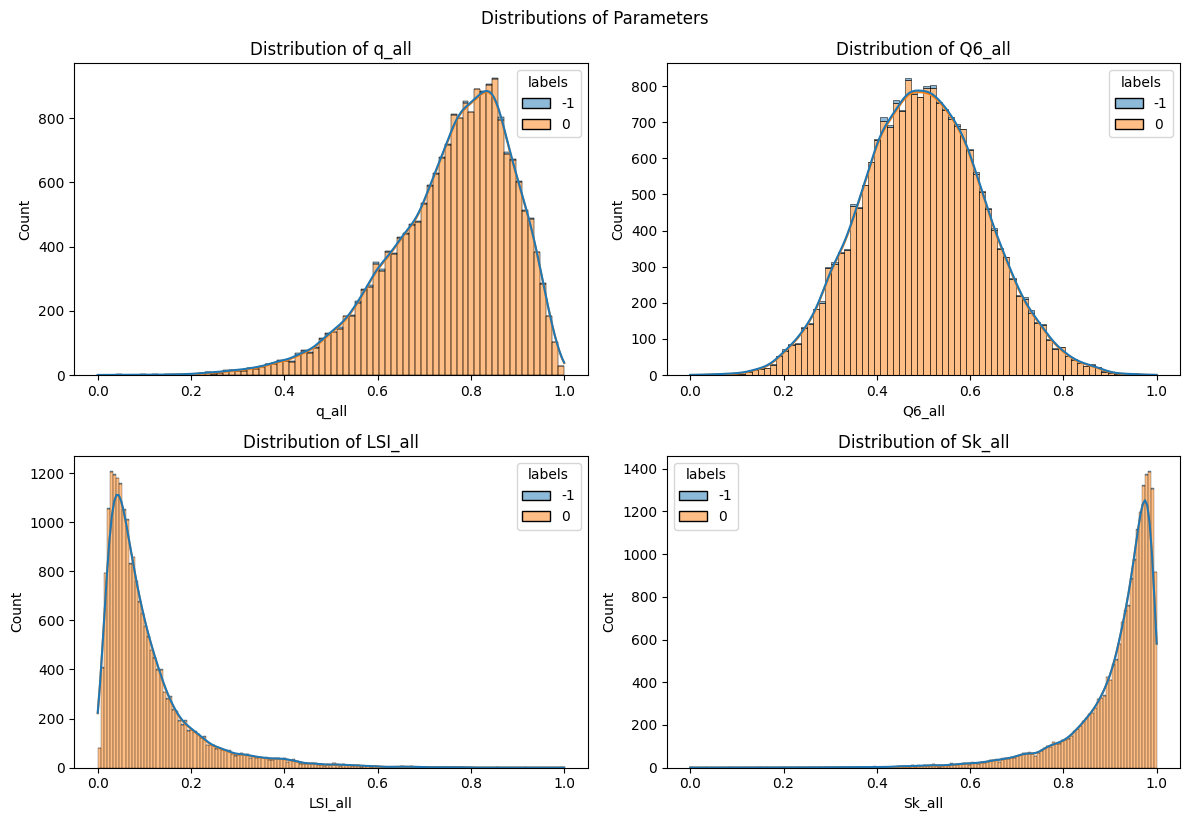

In [7]:
# Plotting pairplot with seaborn
sns.pairplot(df_plot, hue='labels', palette='tab10')
plt.suptitle("Pairplot of Scaled Data with DBSCAN Labels", y=1.02)
plt.show()

# Plotting the distributions to see the actual data distribution
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_plot, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters", y=1.02)
plt.show()

# Plotting original (unscaled) data distributions
plt.figure(figsize=(12, 8))
original_features = [col for col in df_scaled.columns if col != 'labels']
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_plot, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters", y=1.02)
plt.show()

### K-Mean labeling

In [8]:
#df['Q6_all'] = np.log1p(df['Q6_all'])
#df['LSI_all'] = np.log1p(df['LSI_all'])
#df['Sk_all'] = np.log1p(df['Sk_all'])#

# K-Means Clustering with 2 clusters
t0 = time()
kmeans = cluster.KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)
t1 = time()
print(f"KMeans clustering time: {t1 - t0:.2f} sec")

# Add labels to the dataframe
df_scaled['labels'] = labels

# Evaluating the clustering
sil_score = silhouette_score(df_scaled.drop('labels', axis=1), labels)
print(f'Silhouette Score: {sil_score:.4f}')

KMeans clustering time: 0.27 sec
Silhouette Score: 0.2465


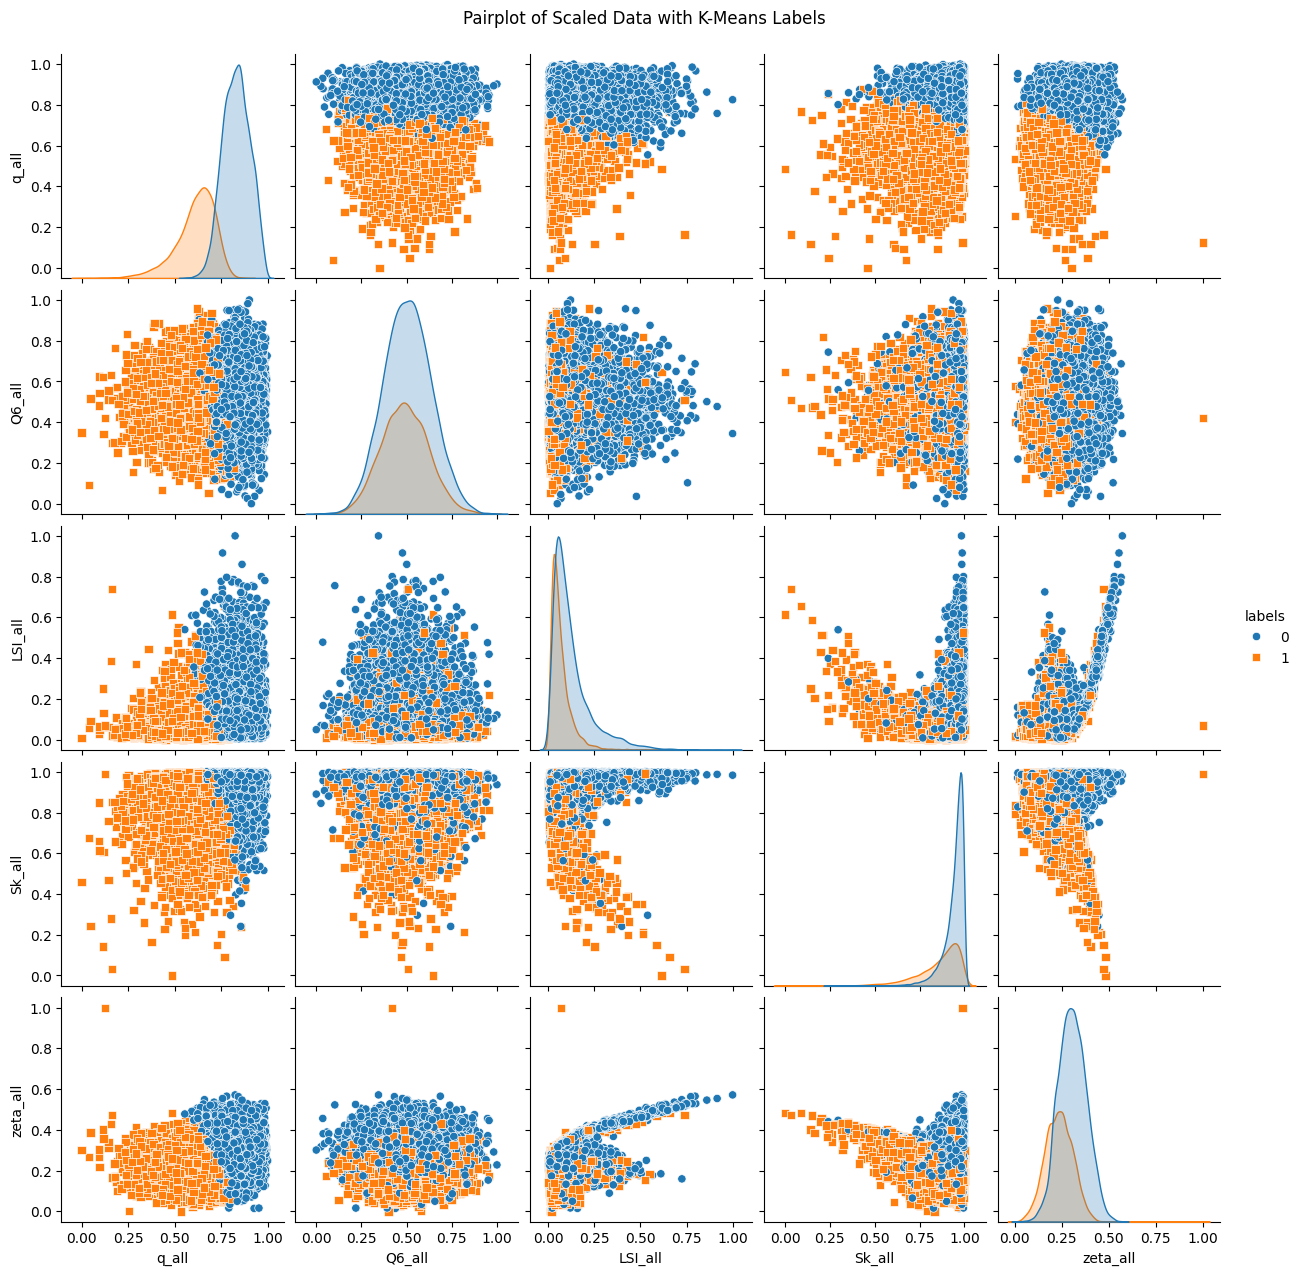

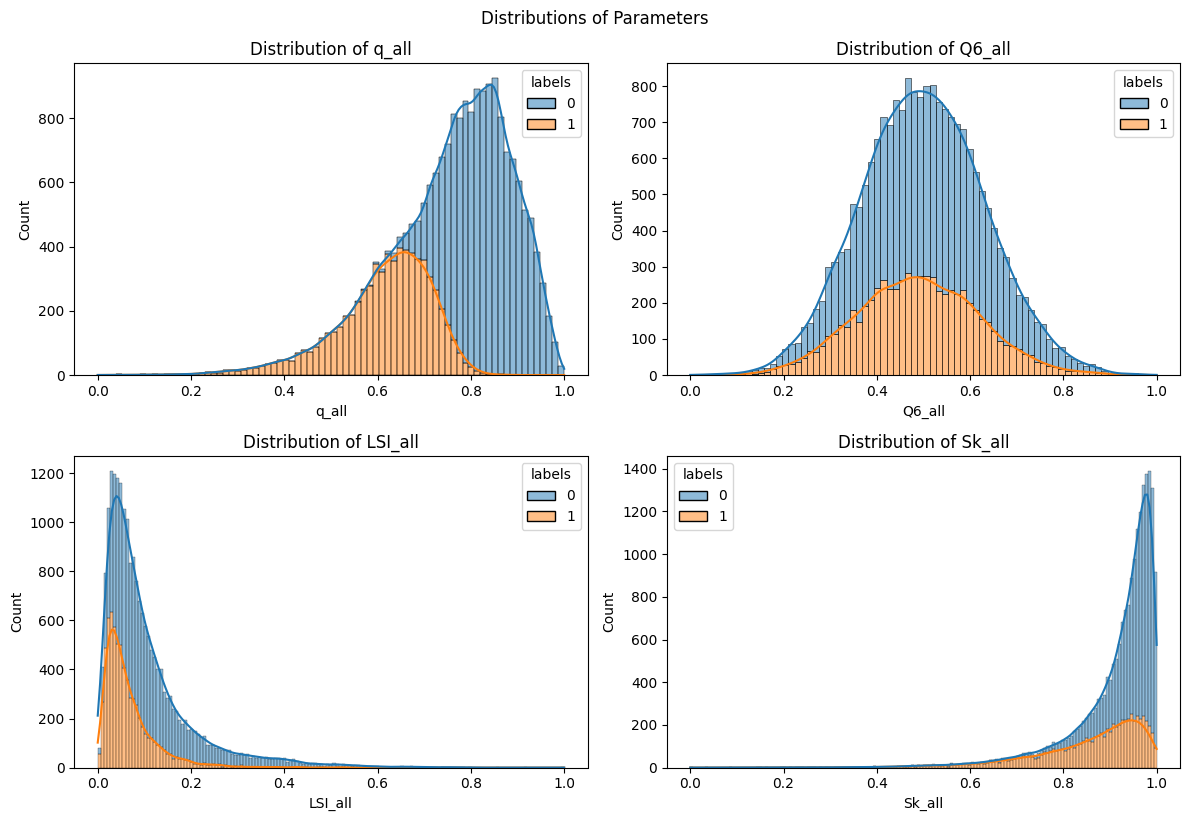

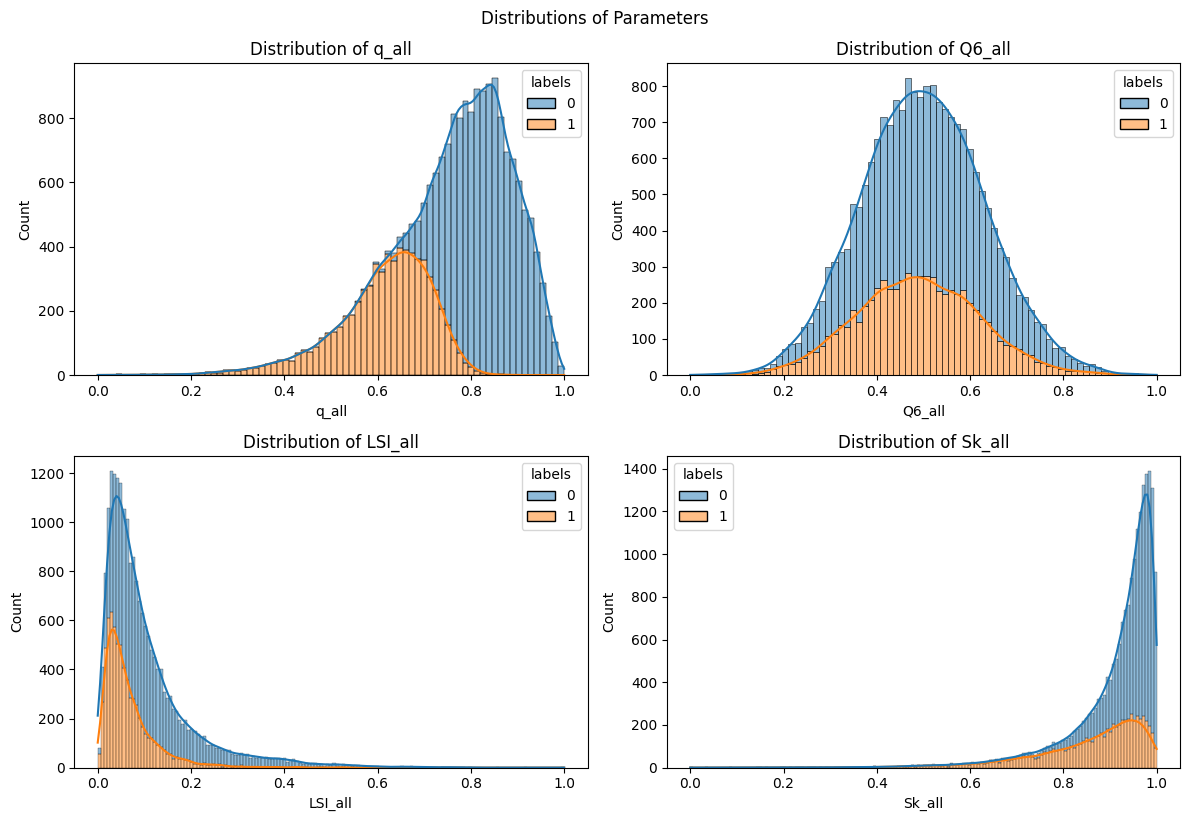

In [9]:
# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.suptitle("Pairplot of Scaled Data with K-Means Labels", y=1.02)
plt.show()

# Plotting the distributions to see the actual data distribution
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters", y=1.02)
plt.show()

# Create a copy with labels for plotting only
df_plot = df_scaled.copy()
df_plot['labels'] = labels

# Plotting the distributions to see the actual data distribution
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1): # Use original df_scaled without labels
    plt.subplot(2, 2, i)
    sns.histplot(data=df_plot, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters", y=1.02)
plt.show()

In [10]:
#df['q_all'] = np.log1p(df['q_all'])
#df['Q6_all'] = np.log1p(df['Q6_all'])
#df['LSI_all'] = np.log1p(df['LSI_all'])
#df['Sk_all'] = np.log1p(df['Sk_all'])

# Scaling the data again after transformation
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# K-Means Clustering with 2 clusters
t0 = time()
kmeans = cluster.KMeans(n_clusters=2, random_state=0, init='k-means++', n_init=10)
kmeans.fit(df_scaled)
t1 = time()
print("KMeans: %.2g sec" % (t1 - t0))

# Assigning labels and adding to DataFrame
labels = kmeans.labels_
df_scaled['labels'] = labels

KMeans: 0.17 sec


Silhouette Score: 0.24566671478417446


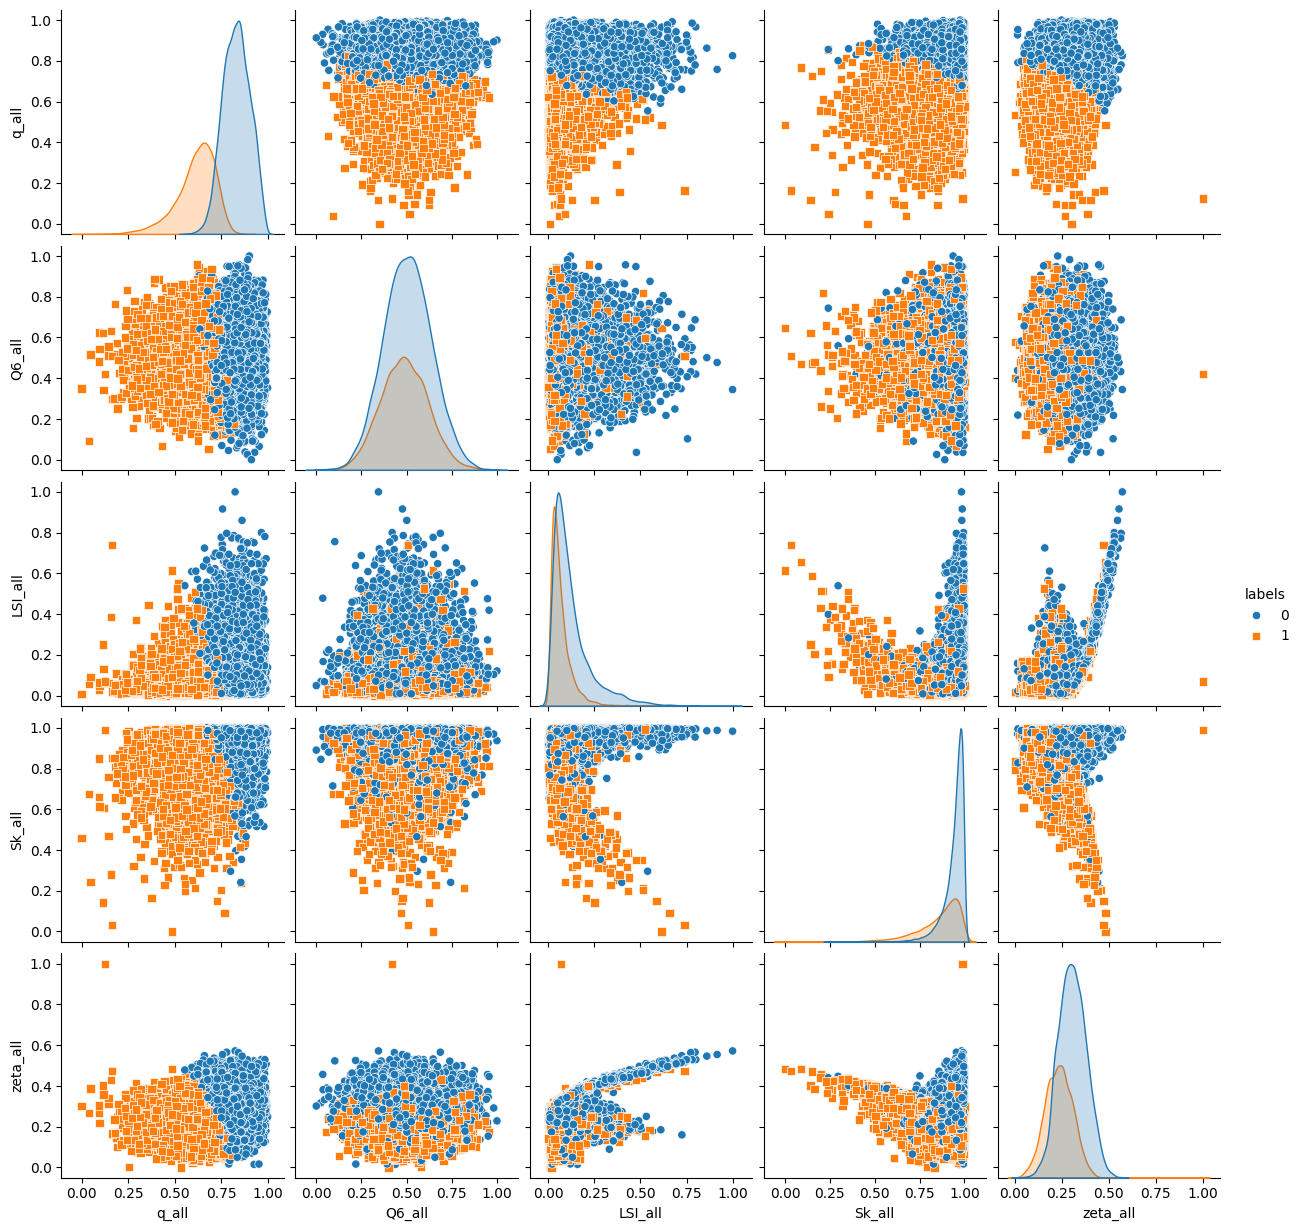

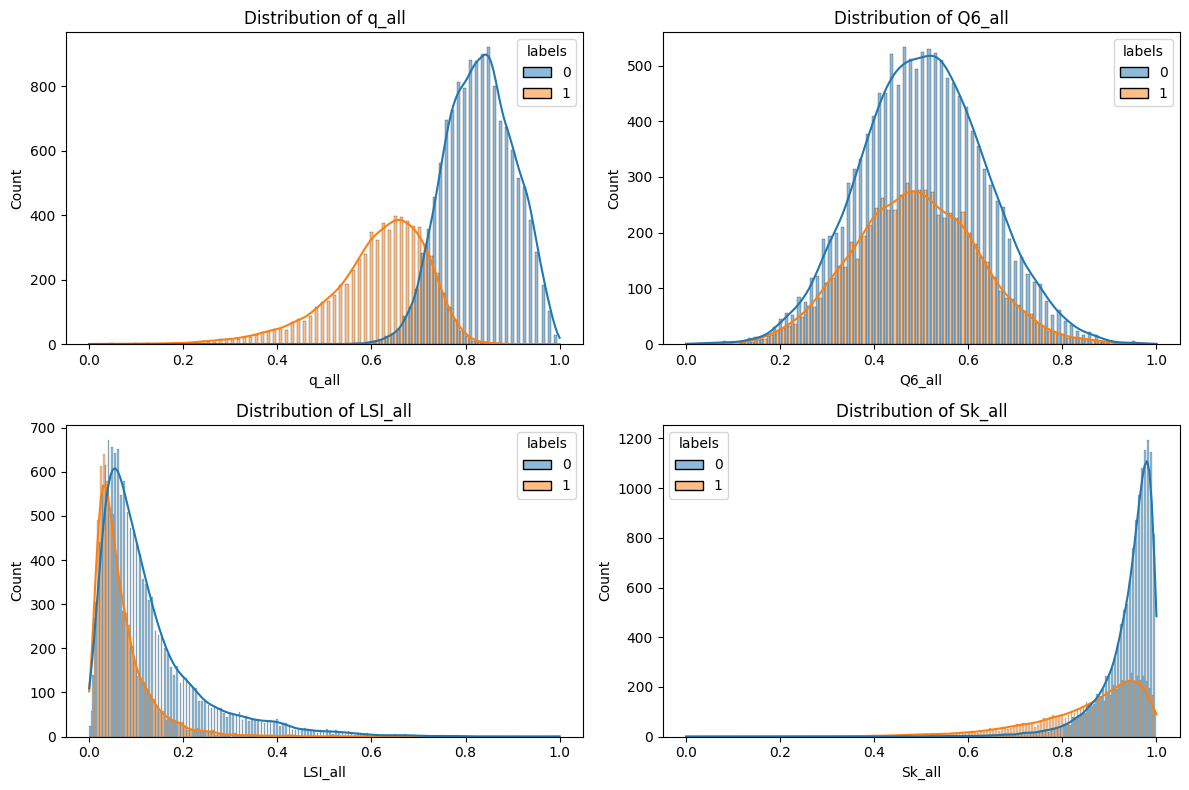

In [11]:

# Evaluating the clustering
sil_score = silhouette_score(df_scaled.drop('labels', axis=1), labels)
print(f'Silhouette Score: {sil_score}')

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.show()

# Plotting the distributions to see the peaks
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### K_mean Clustering

In [12]:
# K-Means Clustering with 2 clusters
t0 = time()
kmeans = cluster.KMeans(n_clusters=2, random_state=0, init='k-means++', n_init=20, max_iter=300)
kmeans.fit(df_scaled)
t1 = time()
print("KMeans: %.2g sec" % (t1 - t0))

# Assigning labels and adding to DataFrame
labels = kmeans.labels_
df_scaled['labels'] = labels

# Evaluating the clustering
sil_score = silhouette_score(df_scaled.drop('labels', axis=1), labels)
print(f'Silhouette Score: {sil_score}')

KMeans: 0.11 sec
Silhouette Score: 0.24566671478417446


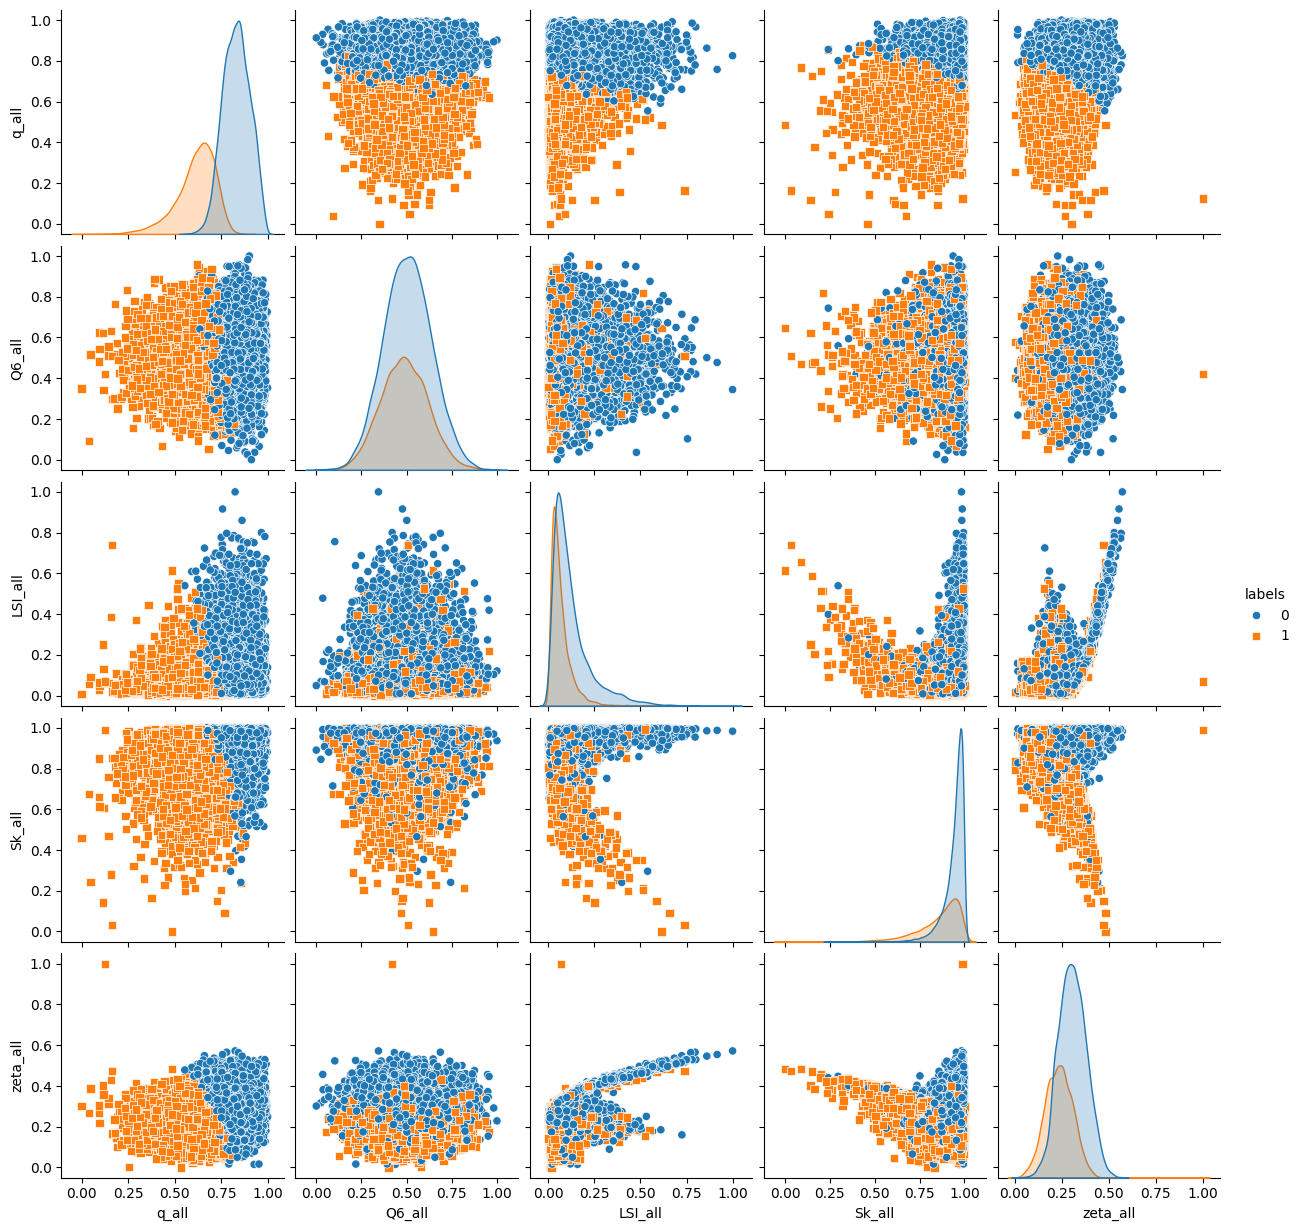

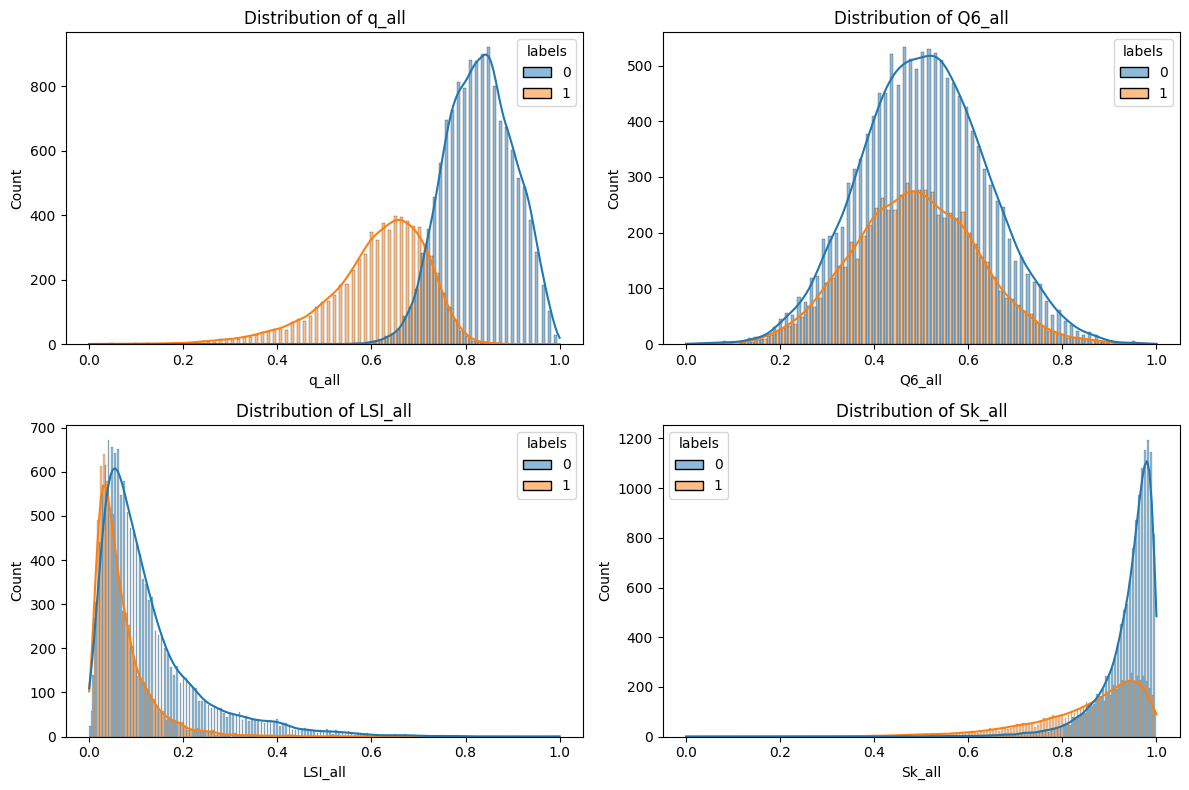

In [13]:
# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.show()

# Plotting the distributions to see the peaks
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### DBSCAN

DBSCAN: 6.9 sec
Silhouette Score: 0.2456394073925444


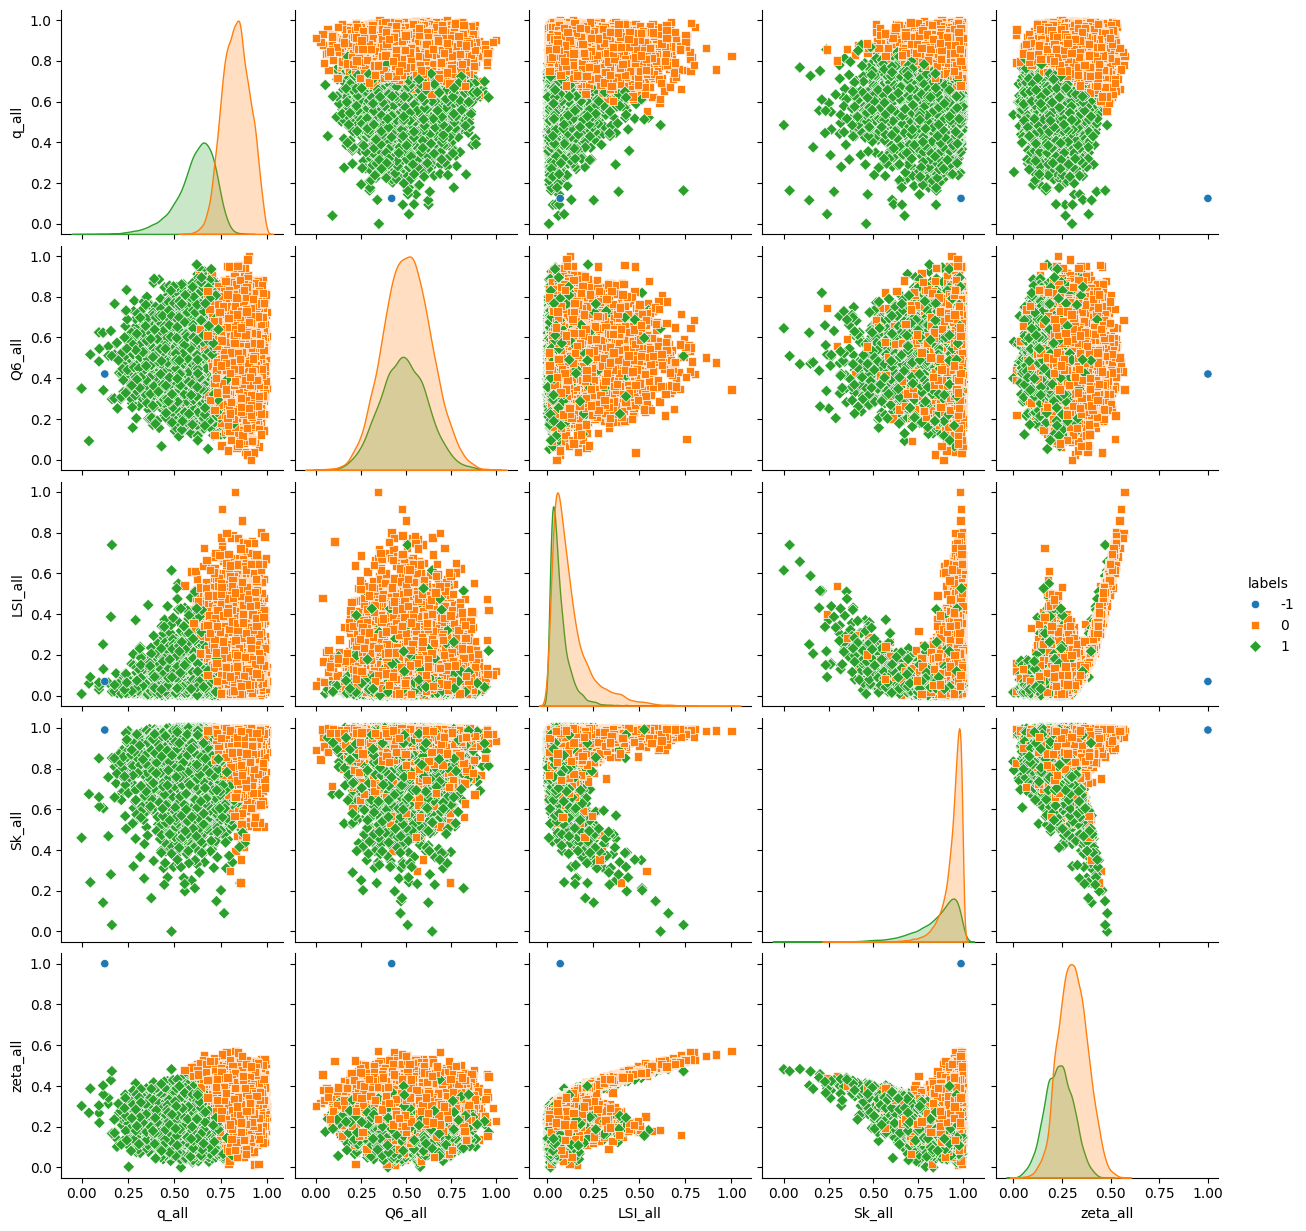

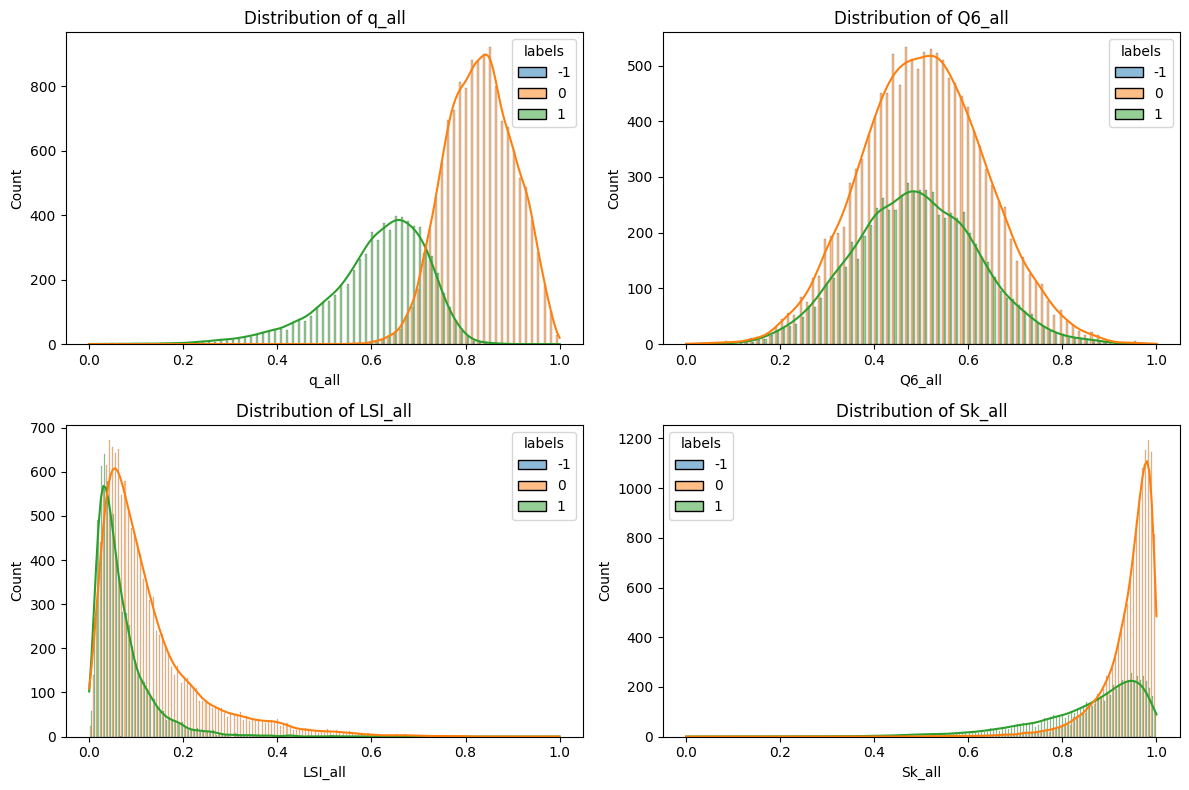

In [14]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering with optimized parameters
t0 = time()
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(df_scaled)
t1 = time()
print("DBSCAN: %.2g sec" % (t1 - t0))

# Add labels to the DataFrame
df_scaled['labels'] = labels

# Evaluating the clustering (Silhouette score may not be meaningful for DBSCAN)
# Calculate silhouette score for non-noise points
mask = labels != -1  # Exclude noise points
sil_score = silhouette_score(df_scaled[mask].drop('labels', axis=1), labels[mask]) if np.any(mask) else "N/A"
print(f'Silhouette Score: {sil_score}')

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s", "D"], palette='tab10')
plt.show()

# Plotting the distributions to see the clusters
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [15]:
eps_value = 0.3  # Adjust as needed
min_samples_value = 5  # Adjust as needed

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(df_scaled)

# Add labels to the DataFrame
df_scaled['labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters_}')

Number of clusters: 2


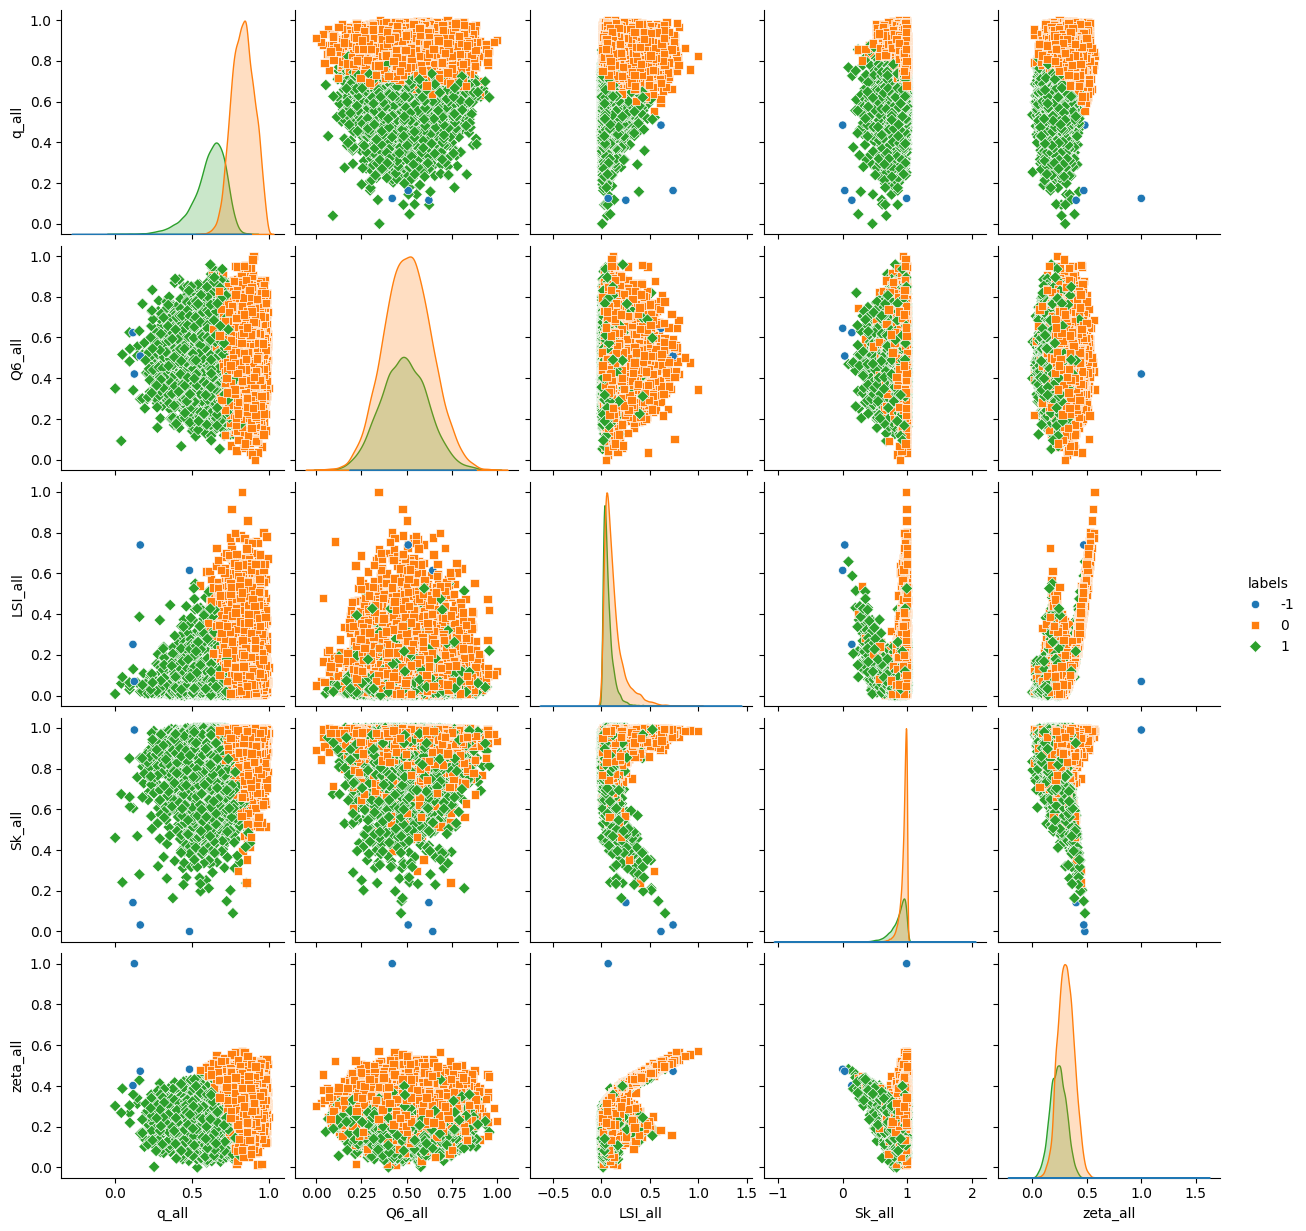

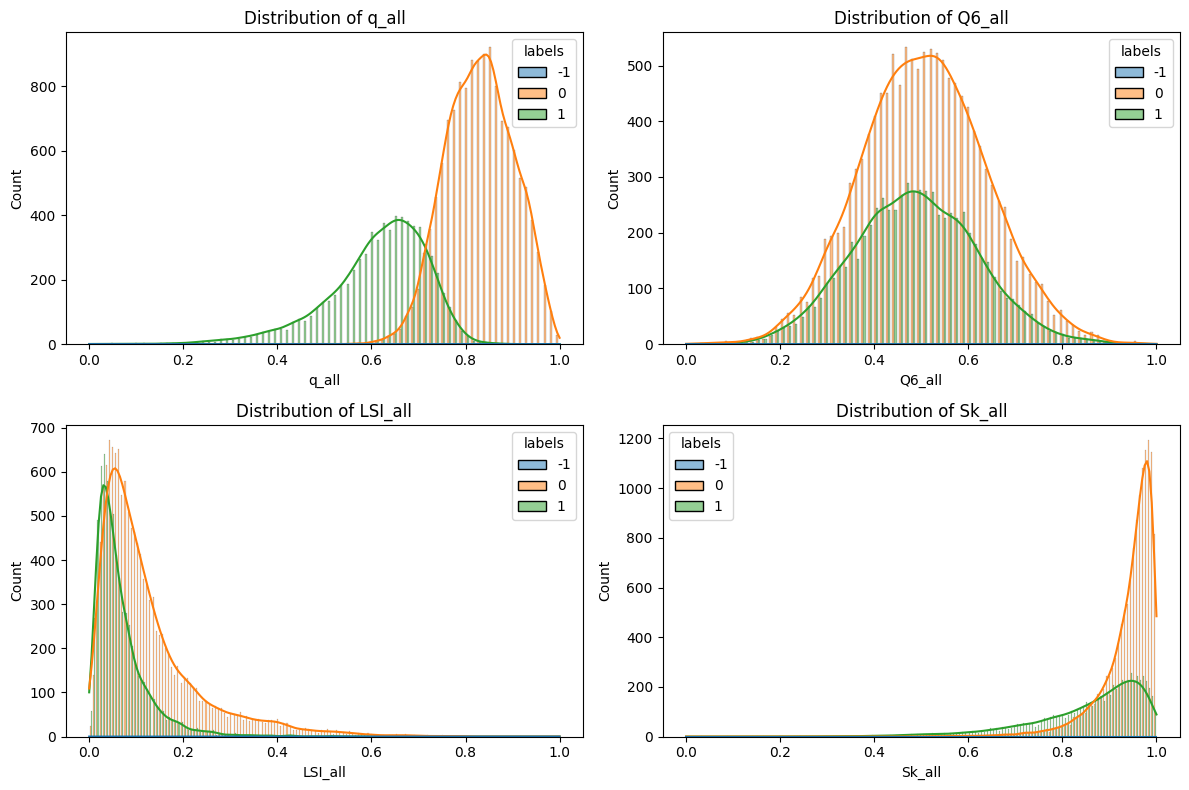

In [16]:
# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s", "D"], palette='tab10')
plt.show()

# Plotting the distributions to see the clusters
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### DB Scan

In [22]:
from sklearn.mixture import GaussianMixture

# Generate markers based on the number of unique labels
unique_labels = np.unique(labels)
num_labels = len(unique_labels)
markers = ["o", "s", "D", "^", "v", "<", ">", "P", "X", "h"][:num_labels]  # Choose markers up to 10 unique clusters

# DBSCAN Clustering
t0 = time()
dbscan = cluster.DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on data characteristics
labels = dbscan.fit_predict(df_scaled)
t1 = time()
print(f"DBSCAN clustering time: {t1 - t0:.2f} sec")

# Add labels to the dataframe
df_scaled['labels'] = labels

# Evaluate the clustering with silhouette score (ignoring noise points labeled as -1)
if len(set(labels)) > 1:
    sil_score = silhouette_score(df_scaled.drop('labels', axis=1)[labels != -1], labels[labels != -1])
    print(f'Silhouette Score: {sil_score:.4f}')
else:
    print("Silhouette Score: Only one cluster found (or all points are noise).")


DBSCAN clustering time: 9.35 sec
Silhouette Score: 0.2330


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) th

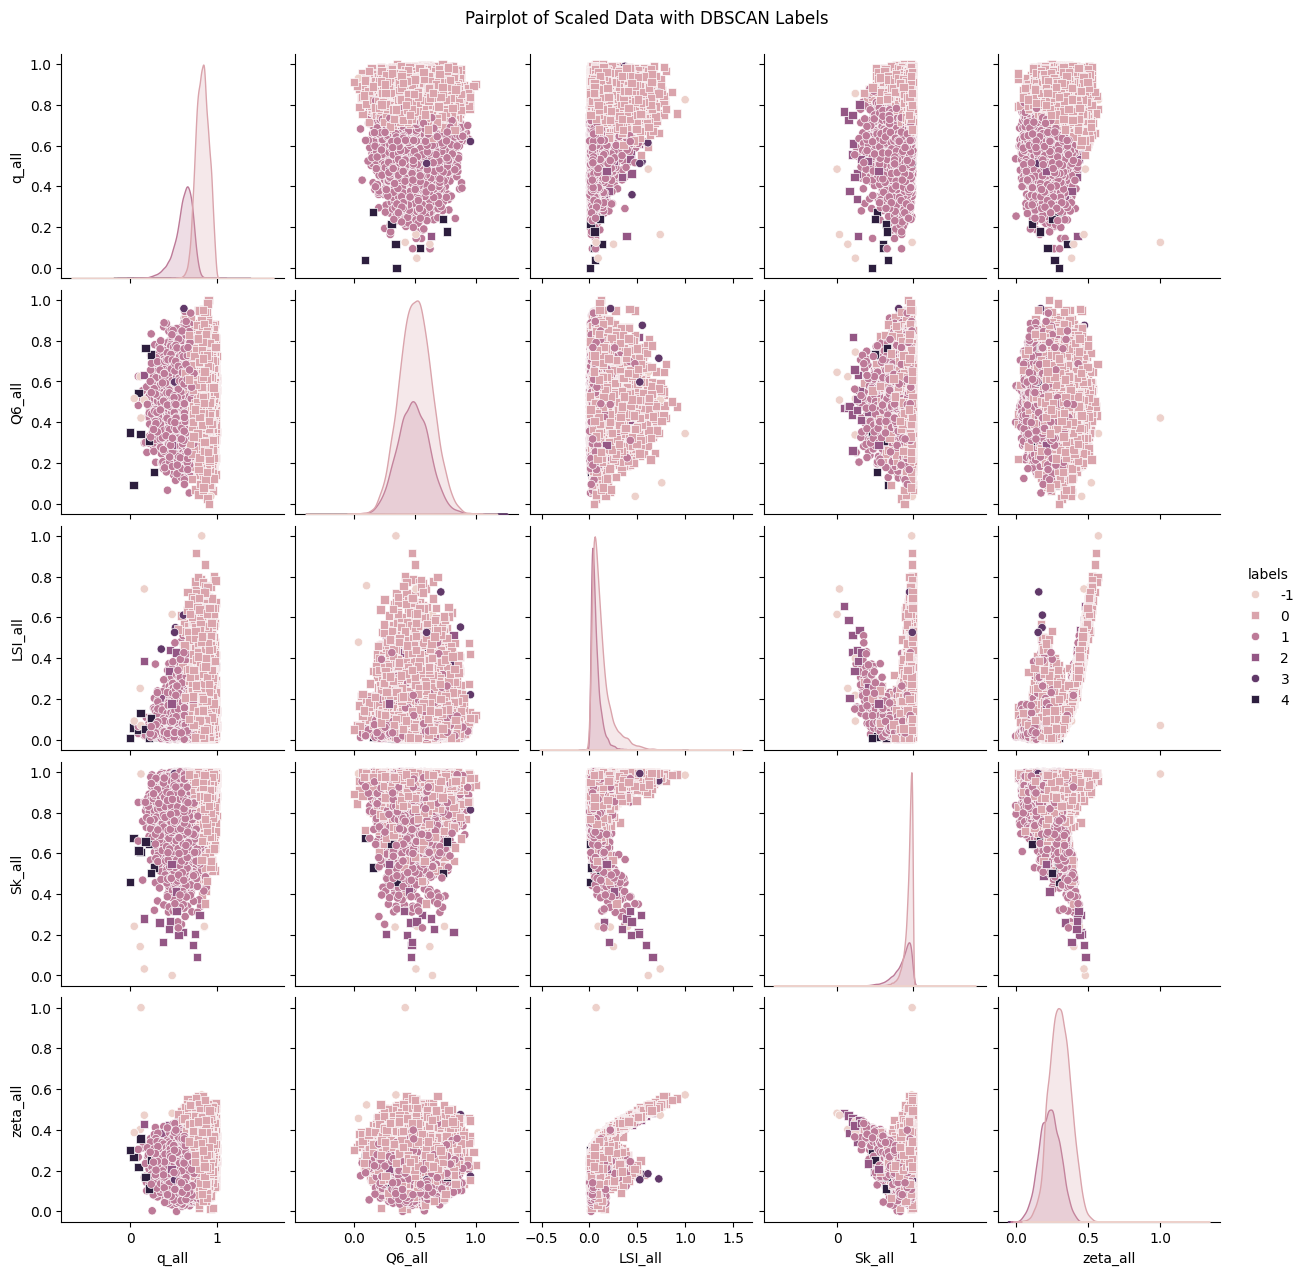

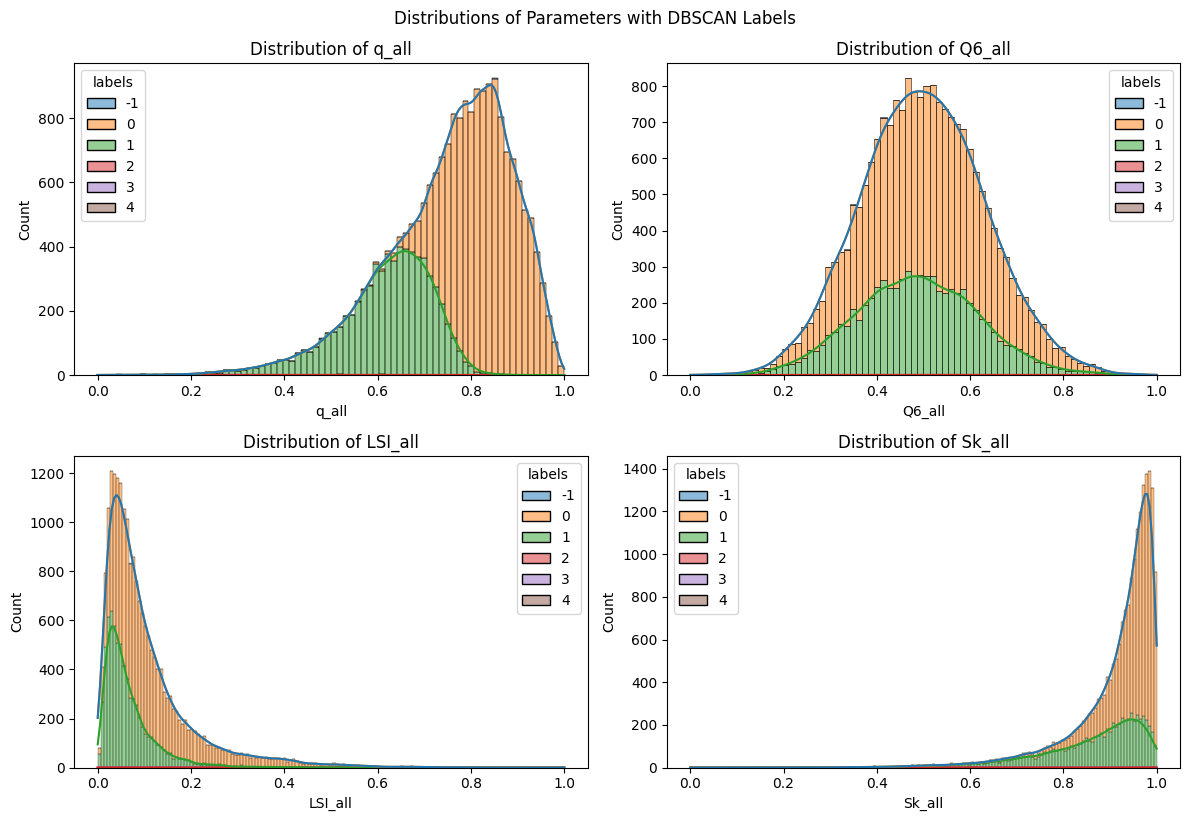

In [24]:
# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.suptitle("Pairplot of Scaled Data with DBSCAN Labels", y=1.02)
plt.show()

# Plotting the distributions to see the actual data distribution
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters with DBSCAN Labels", y=1.02)
plt.show()

In [ ]:
# Plotting original (unscaled) data distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} (Unscaled)')
plt.tight_layout()
plt.suptitle("Distributions of Original (Unscaled) Parameters", y=1.02)
plt.show()

In [32]:
df_scaled.drop('labels', axis=1, inplace=True)

## GMM clustering


In [55]:
n_components = 3
gmm = GaussianMixture(
    n_components=n_components,
    covariance_type='full',
    random_state= 10010,
    n_init = 10,
    max_iter = 100
)
feature_cols = ['q_all', 'Q6_all', 'LSI_all', 'Sk_all', 'zeta_all']
gmm.fit(df_scaled[feature_cols])

GaussianMixture(n_components=3, n_init=10, random_state=10010)

In [56]:
gmm_labels = gmm.predict(df_scaled)
gmm_probs = gmm.predict_proba(df_scaled)

In [57]:
df_scaled_copy = df_scaled.copy()
df_scaled_copy['gmm_labels'] = gmm_labels
df_scaled_copy['prob_cluster_0'] = gmm_probs[:, 0]
df_scaled_copy['prob_cluster_1'] = gmm_probs[:, 1]
df_scaled_copy['prob_cluster_2'] = gmm_probs[:, 2]

In [61]:
print("="*50)
print("GMM CLUSTERING RESULTS")
print("="*50)

# Mixing weights (corresponds to Tanaka's fraction s)
for i in range(n_components):
    print(f"  Cluster {i}: {gmm.weights_[i]:.4f} ({100*gmm.weights_[i]:.1f}%)")

GMM CLUSTERING RESULTS
  Cluster 0: 0.5329 (53.3%)
  Cluster 1: 0.2311 (23.1%)
  Cluster 2: 0.2360 (23.6%)


In [50]:
print(f"\nCluster centers (means in scaled space):")
for i in range(n_components):
  print(f'cluster{i}')
  for j, col in enumerate(df_scaled_copy.columns[:5]):
    print(f"{col}: {gmm.means_[i, j]:.4f}")


Cluster centers (means in scaled space):
cluster0
q_all: 0.6913
Q6_all: 0.4961
LSI_all: 0.0622
Sk_all: 0.8459
zeta_all: 0.2364
cluster1
q_all: 0.8043
Q6_all: 0.5012
LSI_all: 0.1388
Sk_all: 0.9607
zeta_all: 0.3139


In [62]:
zeta_idx = 4  # Index of zeta_all in feature list
mean_zetas = [gmm.means_[i, zeta_idx] for i in range(n_components)]

# Sort clusters by mean zeta (low to high)
cluster_order = np.argsort(mean_zetas)

print(f"\nCluster identification (ordered by zeta):")
for rank, cluster_id in enumerate(cluster_order):
    print(f"  Cluster {cluster_id}: mean zeta = {mean_zetas[cluster_id]:.4f} (rank: {rank+1})")

# Interpret clusters
print(f"\nPhysical interpretation:")
print(f"  Lowest zeta (Cluster {cluster_order[0]}): Strong DNLS (highly disordered)")
print(f"  Middle zeta (Cluster {cluster_order[1]}): Intermediate/Transitional")
print(f"  Highest zeta (Cluster {cluster_order[2]}): Strong LFTS (tetrahedral)")


Cluster identification (ordered by zeta):
  Cluster 2: mean zeta = 0.2431 (rank: 1)
  Cluster 0: mean zeta = 0.2538 (rank: 2)
  Cluster 1: mean zeta = 0.3822 (rank: 3)

Physical interpretation:
  Lowest zeta (Cluster 2): Strong DNLS (highly disordered)
  Middle zeta (Cluster 0): Intermediate/Transitional
  Highest zeta (Cluster 1): Strong LFTS (tetrahedral)


In [63]:
gmm_sil = silhouette_score(df_scaled, gmm_labels)
print(f"\nSilhouette Score: {gmm_sil:.4f}")

bic = gmm.bic(df_scaled)
aic = gmm.aic(df_scaled)
print(f"BIC: {bic:.2f}")
print(f"AIC: {aic:.2f}")


Silhouette Score: 0.1347
BIC: -224734.50
AIC: -225225.99


<Figure size 1500x1200 with 0 Axes>

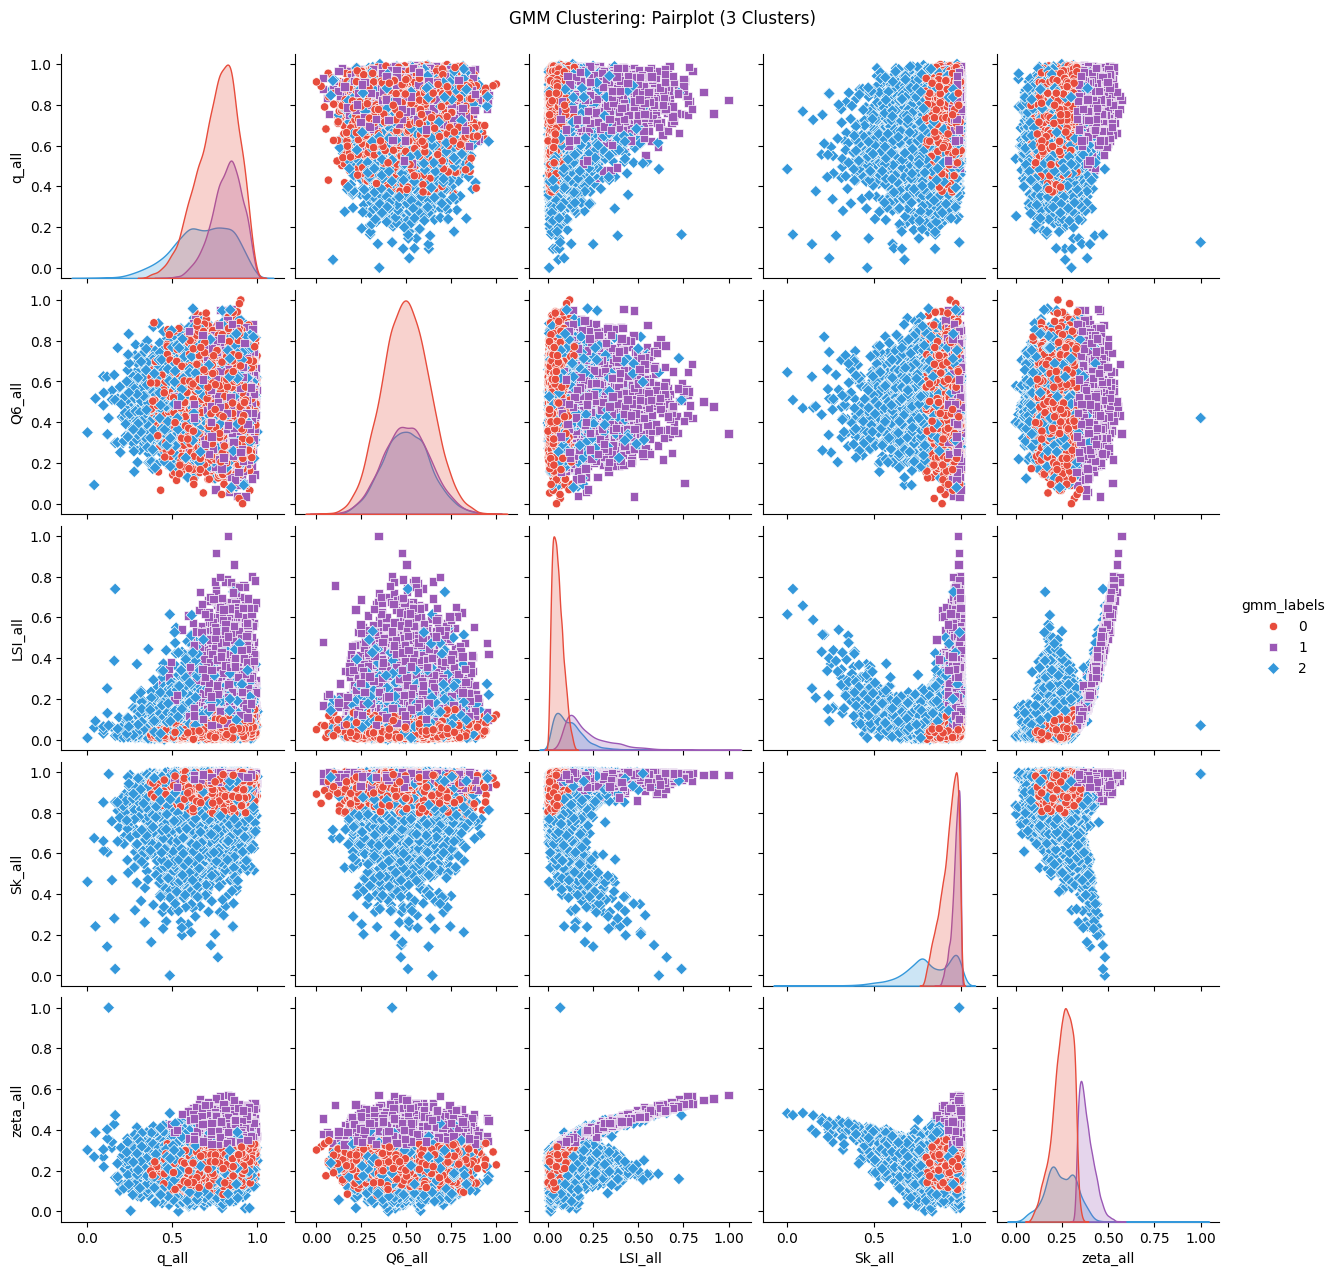

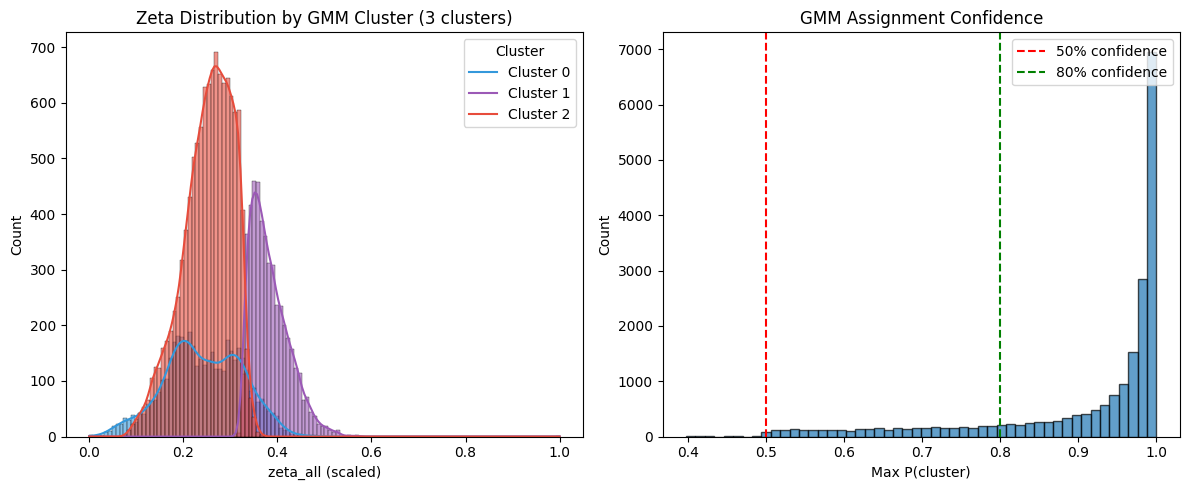

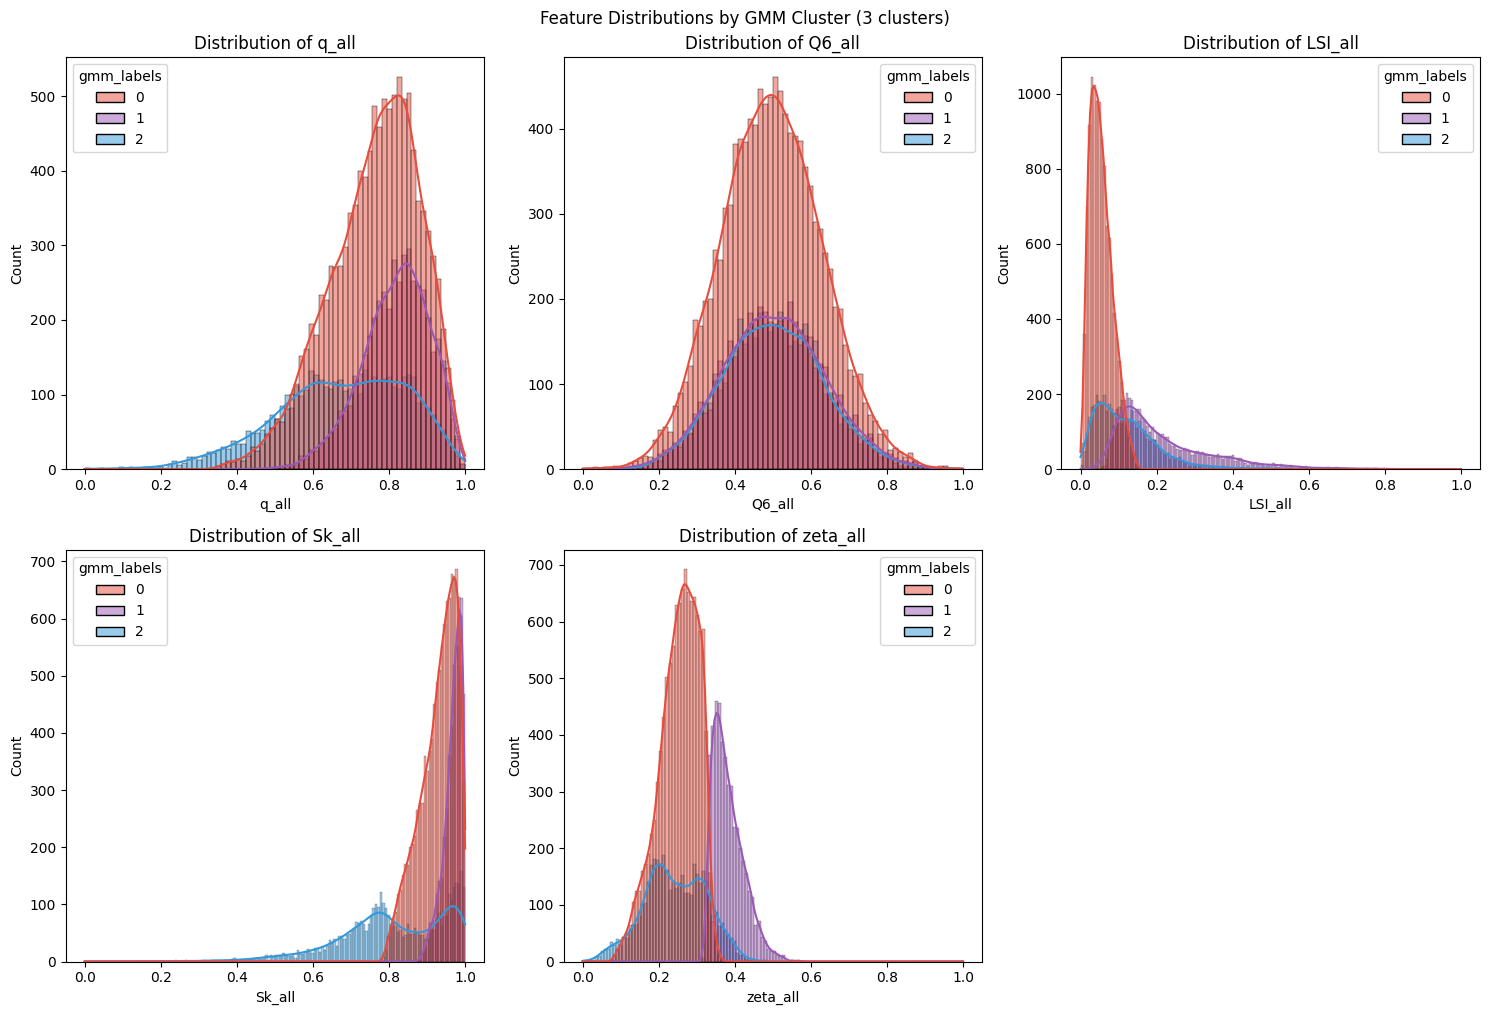


GMM 3-CLUSTER ANALYSIS COMPLETE


In [64]:
#Create plotting dataframe
plot_df = df_scaled[['q_all', 'Q6_all', 'LSI_all', 'Sk_all', 'zeta_all']].copy()
plot_df['gmm_labels'] = gmm_labels
# Pairplot with 3 colors
plt.figure(figsize=(15, 12))
sns.pairplot(
    plot_df,
    hue='gmm_labels',
    markers=["o", "s", "D"],  # Three markers for three clusters
    palette=['#E74C3C', '#9B59B6', '#3498DB']  # Red, Purple, Blue
)
plt.suptitle("GMM Clustering: Pairplot (3 Clusters)", y=1.02)
plt.show()
# Zeta distribution by cluster
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(
    data=plot_df,
    x='zeta_all',
    hue='gmm_labels',
    multiple='layer',
    kde=True,
    palette=['#E74C3C', '#9B59B6', '#3498DB'],
    alpha=0.6
)
plt.title('Zeta Distribution by GMM Cluster (3 clusters)')
plt.xlabel('zeta_all (scaled)')
plt.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(3)])
# Confidence distribution
plt.subplot(1, 2, 2)
confidence = np.max(gmm_probs, axis=1)  # Max probability across 3 clusters
plt.hist(confidence, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0.5, color='red', linestyle='--', label='50% confidence')
plt.axvline(x=0.8, color='green', linestyle='--', label='80% confidence')
plt.title('GMM Assignment Confidence')
plt.xlabel('Max P(cluster)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()
# Feature distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(['q_all', 'Q6_all', 'LSI_all', 'Sk_all', 'zeta_all'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(
        data=plot_df,
        x=column,
        hue='gmm_labels',
        multiple='layer',
        palette=['#E74C3C', '#9B59B6', '#3498DB'],
        kde=True,
        alpha=0.5
    )
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Feature Distributions by GMM Cluster (3 clusters)", y=1.01)
plt.show()
print("\n" + "="*50)
print("GMM 3-CLUSTER ANALYSIS COMPLETE")
print("="*50)
